In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta       

In [4]:
df = pd.read_csv('ENB2012_data.csv')
df

#note to self :

#input parameters
# X1 Relative Compactness
# X2 Surface Area
# X3 Wall Area
# X4 Roof Area
# X5 Overall Height
# X6 Orientation
# X7 Glazing Area
# X8 Glazing Area Distribution

# outputs
# y1 Heating Load
# y2 Cooling Load




,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
def check_clean_data(df):
    print(df.isnull().sum()) #check for null values
    print("\n(Rows, Columns)", df.shape) #check for missing values

    print("\nCheck for empty values")
    print(df[df.eq("?").any(1)]) #check for missing values

In [6]:
check_clean_data(df)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

(Rows, Columns) (768, 10)

Check for empty values
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []


In [7]:
def df_stats(df):
    print(df.describe())
    

In [8]:
df_stats(df)

               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307201   24.587760  
std      0.133221    1.55096   10.090196    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25% 

In [9]:
#Function to compute probability density function of beta distribution parameterized by a and b
def Beta_distribution(theta_values, a,b):
    Beta = lambda theta,a,b: ((theta**(a-1))*((1-theta)**(b-1)))/beta(a,b)
    theta_vals = np.linspace(0.1,0.99,100)
    p_vals = Beta(theta_vals, a, b)
    for index in range(len(p_vals)):
        p_vals[index] = p_vals[index]*100
        
    return [theta_vals, p_vals, a, b]





<AxesSubplot:>

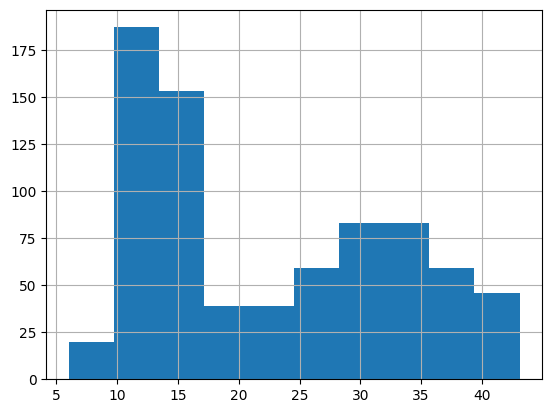

In [10]:
#plot y1 and y2

#create a box plot of df["Y1"]
df["Y1"].hist()




<AxesSubplot:>

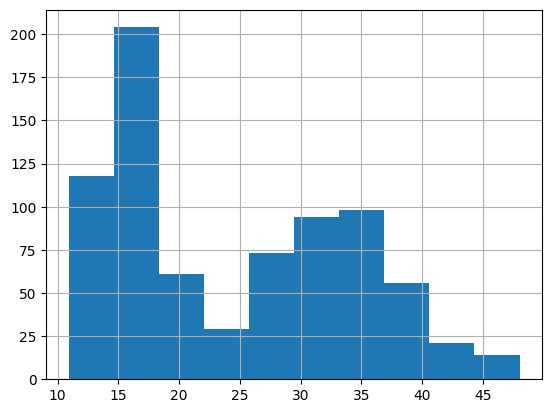

In [11]:
df["Y2"].hist()

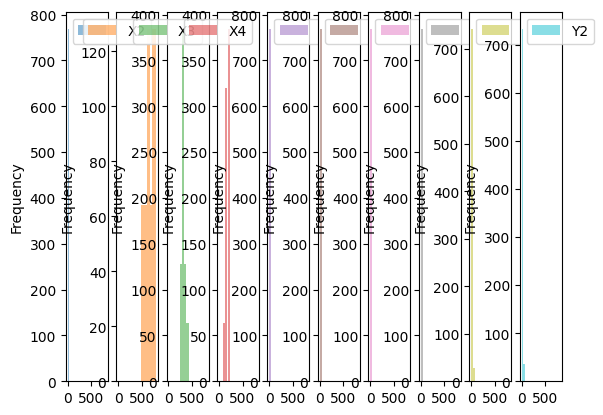

In [13]:
df.plot.hist(alpha=0.5, bins=20, subplots=True, layout=(1,10), figsize=(20,5))
plt.show()